In [3]:
# use least squares method as the way to estimate the coefficients
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import seaborn as sns

from sklearn.datasets import load_boston

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
boston = load_boston()

In [7]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
x = boston_df.RM

In [21]:
x.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [22]:
# numpy needs to know how many values for each particular attribute
x = np.vstack(boston_df.RM)

In [23]:
# here there are 506 values for 1 attribute
x.shape

(506, 1)

In [24]:
y = boston_df.Price

In algebra

y = mx + b

We need to do it with matrices

y = Ap

A = [x 1]
p = [ m ]
    [ b ]

In [25]:
# create an array in the form of [x 1]
x = np.array([ [value,1] for value in x])

In [26]:
x

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [27]:
m, b = np.linalg.lstsq(x, y)[0]

D:\Programms\Program Files(x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [23]:
m

9.102108981180315

In [24]:
b

-34.67062077643857

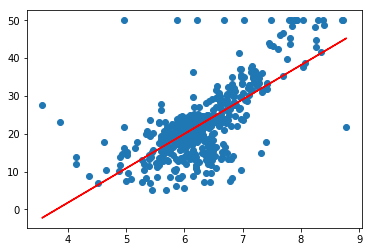

In [27]:
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x, m*x+b, 'r', label="Best Fit Line")

In [37]:
## Getting the error, cause this is similar to a standard diviation
result = np.linalg.lstsq(x,y)
error_total = result[1]

# root mean squared error
rmse = np.sqrt(error_total/len(x))

print('The root mean square error was ', rmse)

## we now can say the price of a house won't vary more than two times the rmse value 95% of the time

The root mean square error was  [6.60307139]


D:\Programms\Program Files(x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [1]:
# Using scikit learn to implement a multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression

<p> This linear_model class is an estimator</p>
Estimators predict a value based on the observed data.
On scikit-learn all estimators implement the fit() and predict() methods.

<p> fit() is used to learn the paramenters of a model</p>
predict() is to predict the value of a response variable for an explanatoryy variable using the learned parameters

<p> Check out: 
<ul>
    <li> Coefficient of Determination</li>
</ul> 
</p>

In [2]:
lreg = LinearRegression()

In [9]:
x_multi = boston_df.drop('Price', 1)
y_target = boston_df.Price

In [14]:
# this is basically all we did manually previously in one single step
lreg.fit(x_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Estimated intercept coefficient is ', round(lreg.intercept_, 2))
print('Number of coefficients used', len(lreg.coef_))

Estimated intercept coefficient is  36.49
Number of coefficients used 13


In [19]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimator'] = Series(lreg.coef_)
coeff_df

## notice that the highest correlation with the price is the number of room in the house RM

,Features,Coefficient Estimator
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [29]:
from sklearn.model_selection import train_test_split

In [59]:
# using training and validation
x_train, x_test, y_train, y_test = train_test_split(x, boston_df.Price)

In [60]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(379, 2) (127, 2)
(379,) (127,)


In [61]:
# now we can predict
lreg = LinearRegression()

In [62]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

In [64]:
print('Fit a model x_train and calculate MSE with y_train: ', np.mean(round( (y_train - pred_train)**2, 2)))

Fit a model x_train and calculate MSE with y_train:  42.900633245382636


In [65]:
print('Fit a model x_train and calculate MSE with x_test and y_test', np.mean(round( (y_test - pred_test)**2, 2)) )

Fit a model x_train and calculate MSE with x_test and y_test 45.7948031496063


Text(0.5,1,'Residual Plots')

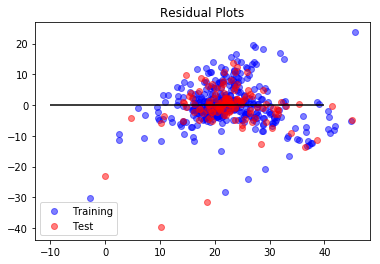

In [67]:
# let's do a residual plot to vizualize how good our analysis was.
train = plt.scatter(pred_train, (pred_train - y_train), c = 'b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test - y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-10, xmax=40)
plt.legend((train,test), ('Training','Test'), loc='lower left')
plt.title('Residual Plots')